In [ ]:
# HW4 - part b
# Sophia Kuo

In [1]:
from datetime import datetime

input = open('/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/daily-treasury-rates2019.csv',encoding='utf-8')


daily_yield_curves = []
cnt=0
for i in input.readlines():
    
    replaced = i.replace('"','').replace('\n','')
    replaced_lst = replaced.split(',')
    #print(replaced_lst)
    if cnt==0:
        column = replaced_lst
    else:
        for j in range(len(replaced_lst)):
            if j==0:
                replaced_lst[j] = datetime.strptime(replaced_lst[j], '%m/%d/%Y').date().strftime('%m/%d/%y')
            if j!=0:
                replaced_lst[j] = float(replaced_lst[j])
        daily_yield_curves.insert(-cnt,replaced_lst)
    cnt+=1
    
daily_yield_curves.insert(0,column)
#daily_yield_curves


In [19]:
from datetime import datetime

input = open('/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/daily-treasury-rates2022.csv',encoding='utf-8')


daily_yield_curves = []
cnt=0
for i in input.readlines():
    
    replaced = i.replace('"','').replace('\n','')
    replaced_lst = replaced.split(',')
    #print(replaced_lst)
    if cnt==0:
        column=replaced_lst
        column.pop(4)
    else:
        for j in range(len(replaced_lst)):
            if j==0:
                replaced_lst[j] = datetime.strptime(replaced_lst[j], '%m/%d/%Y').date().strftime('%m/%d/%y')
            if j!=0 and j!=4:
                replaced_lst[j] = float(replaced_lst[j])
        replaced_lst.pop(4)
        daily_yield_curves.insert(-cnt,replaced_lst)

    cnt+=1
    
daily_yield_curves.insert(0,column)
daily_yield_curves

output = open('/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/daily_yield_curves_2022.txt','wt')
for i in daily_yield_curves:
    frmt_row = f"{i[0]: <10} {i[1]: <5} {i[2]: <5} {i[3]: <5} {i[4]: <5} {i[5]: <5} {i[6]: <5} {i[7]: <5} {i[8]: <5} {i[9]: <5} {i[10]: <5} {i[11]: <5} {i[12]: <5}\n"
    output.write(frmt_row)

output

<_io.TextIOWrapper name='/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/daily_yield_curves_2022.txt' mode='wt' encoding='UTF-8'>

In [20]:
daily_yield_curves[0]

['Date',
 '1 Mo',
 '2 Mo',
 '3 Mo',
 '6 Mo',
 '1 Yr',
 '2 Yr',
 '3 Yr',
 '5 Yr',
 '7 Yr',
 '10 Yr',
 '20 Yr',
 '30 Yr']

In [90]:
data[1][0]

'01/03/22'

(1, 249) (12, 1) (12, 249)


/var/folders/_7/j6gsg7kd1vxgq31_w637bnh00000gn/T/ipykernel_22865/771455302.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


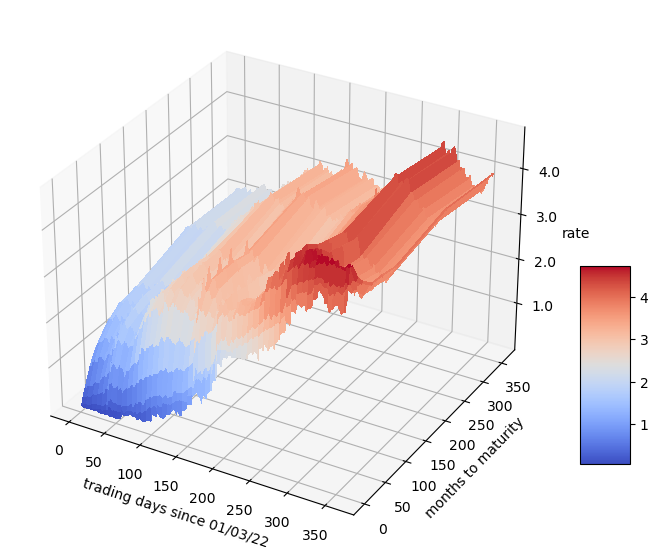

In [127]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


data = daily_yield_curves
x=[]
z=[]

for i in range(len(data)):
    if i==0:
        Y=np.array([[1, 2, 3, 6, 12, 24, 36, 60, 84, 120, 240, 360]]).transpose()
    else:
        x.append((datetime.strptime(data[i][0], '%m/%d/%y') - datetime.strptime(data[1][0], '%m/%d/%y')).days)  
        z.append(data[i][1:])

X=np.array([x])
Z=np.array(z).transpose()

print(X.shape, Y.shape, Z.shape)

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set(xlabel='trading days since 01/03/22', ylabel='months to maturity', zlabel='rate')
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
fig.colorbar(surf, ax = ax, shrink = 1, aspect = 4 , anchor =(0.2,0.35),fraction=0.08) 


fig.show()


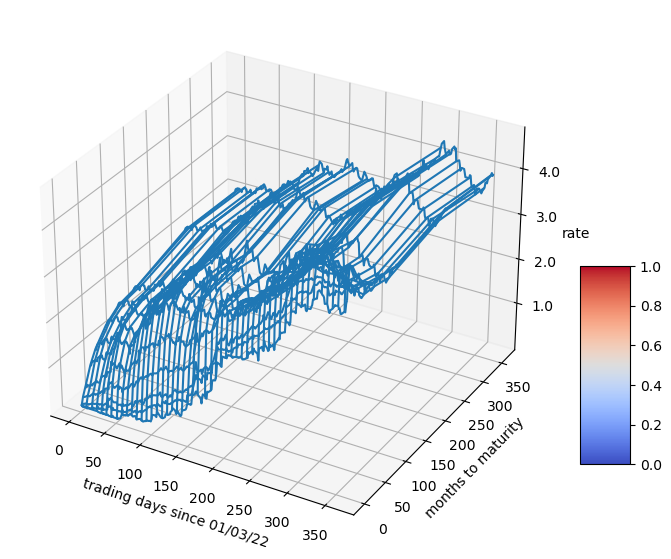

In [139]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_wireframe (X, Y, Z, cmap=cm.coolwarm)
ax.set(xlabel='trading days since 01/03/22', ylabel='months to maturity', zlabel='rate')
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
fig.colorbar(surf, ax = ax, shrink = 1, aspect = 4 , anchor =(0.2,0.35),fraction=0.08) 


plt.show()

Figure(800x1000)
Figure(800x1000)


/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/hw4.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/hw4.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


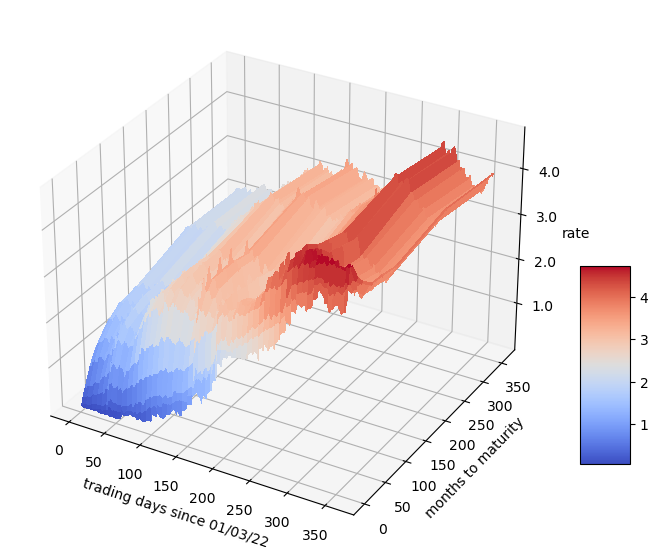

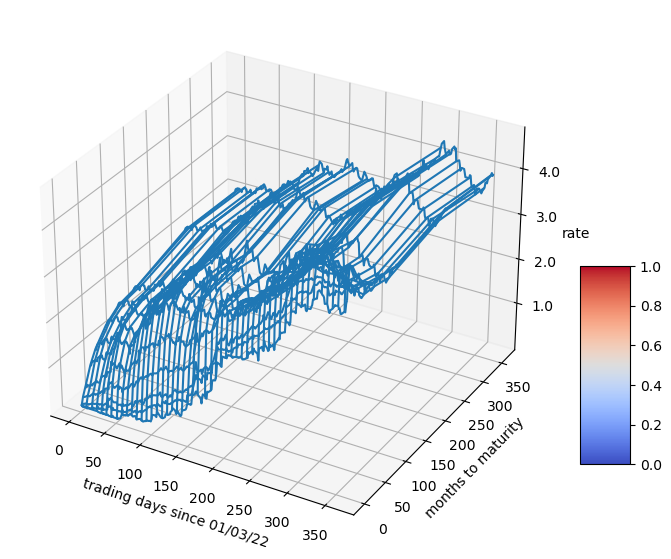

In [143]:
import hw4
import os


script_path = '/Users/sophiakuo/Documents/23F-Python/Assignments/HW4/hw4.py'
os.system(f'python {script_path}')

%run 'hw4.py'